# **Project 2**, APS1070 Fall 2024
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Oct 25th, 11 PM - 13 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself without proper acknowledgment of the source, including generated code (please refer to the course syllabus). Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

**Name: Alton Rego *(here and elsewhere, please replace the underscore with your answer)**

**Student ID: 1004909307**

**DISCLAIMER: CHATGPT was used for this assignment** I have attached a PDF for all the prompts used with my submission.

##**Marking Scheme:**

This project is worth **13 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Check that the completed `.ipynb` file runs correctly when using `Runtime -> Run All`.

2. Download your notebook: `File -> Download .ipynb`

3. Click on the Files icon on the far left menu of Colab

4. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


5. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

6. An HTML version of your notebook will appear in the files, so you can download it.

7. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



# Project 2 [13 Marks]

##**Part 1: Getting started [1.5 Marks]**

We are going to work with the [Thyroid Disease](https://odds.cs.stonybrook.edu/thyroid-disease-dataset/) dataset. This dataset contains 6 clinical attributes to determine whether a patient referred to the clinic is hypothyroid.

 The dataset is called `Thyroid_Disease.csv`. Load the dataset in CSV file using Pandas and name it `df`. Print out the first few columns of the dataset.


* **How many rows are there?**
3772 **[0.1]**
* **Which column contains the targets?**
The column "hypothyroid" contains the targets which can either be 0 or 1 where 0 means that the patient is not hypothyroid, and 1 menas that the patient is hypothyroid. **[0.1]**
* **To what do the target values correspond?**
0 means that the patient is not hypothyroid. 1 means that the patient is hypothyroid. **[0.2]**

In [ ]:
pip install wget

In [ ]:
import wget

wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/main/Thyroid_Disease.csv')

'Thyroid_Disease (1).csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('Thyroid_Disease.csv', index_col = 0)
print(df.head())

   Attribute0  Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  \
0    0.774194    0.001132    0.137571    0.275701    0.295775    0.236066   
1    0.247312    0.000472    0.279886    0.329439    0.535211    0.173770   
2    0.494624    0.003585    0.222960    0.233645    0.525822    0.124590   
3    0.677419    0.001698    0.156546    0.175234    0.333333    0.136066   
4    0.236559    0.000472    0.241935    0.320093    0.333333    0.247541   

   hypothyroid  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  


In [ ]:
# Number of rows in the dataset
num_rows = df.shape[0]
print("Number of rows in the dataset:", num_rows)

Number of rows in the dataset: 3772


In [ ]:
# Unique values in the hypothyroid column
unique_hypothyroid_values = df['hypothyroid'].unique()
print("Unique values in the 'hypothyroid' column:", unique_hypothyroid_values)

Unique values in the 'hypothyroid' column: [0. 1.]


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? _____ **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?_____ **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _____ **[0.2]**


In [ ]:
# Calculating the percentage of entries for each class in the 'hypothyroid' column
hypothyroid_counts = df['hypothyroid'].value_counts(normalize=True) * 100
print("Percentage of entries for each class in the 'hypothyroid' column:\n", hypothyroid_counts)

Percentage of entries for each class in the 'hypothyroid' column:
 hypothyroid
0.0    97.534464
1.0     2.465536
Name: proportion, dtype: float64


**Answer 1. Is this data considered balanced or unbalanced? Why is this the case? [0.1]**

This data is considered unbalanced because the class distribution is highly skewed. Specifically, around 97.5% of the entries are labeled as 0 (no hypothyroidism), and only about 2.5% are labeled as 1 (hypothyroidism). A balanced dataset would have a more equal distribution of 0s and 1s, whereas this dataset has a majority class (0) and a minority class (1).

**Answer 2. Why is balance/imbalance important? How might this class distribution affect a KNN classifier, which we explored in Project 1? [0.2]**


Balance/imbalance is important because machine learning models can become biased toward the majority class in imbalanced datasets. In this case, since 97.5% of the data corresponds to the majority class (0), the model may tend to predict 0 far more often, even when the actual class is 1. This can lead to high accuracy but poor performance on the minority class, which is usually the class of greater interest in many medical diagnosis problems like hypothyroidism detection.

In the case of a KNN (k-nearest neighbors) classifier, the imbalance can have the following effects:

In a KNN classifier, class imbalance biases the model toward the majority class (0) due to the larger number of such instances. This leads to poor recall for the minority class (1), as it is underrepresented in the training data. To address this, methods like adjusting class weights, oversampling the minority class, or undersampling the majority class can be used.

Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [ ]:
### Split the data  ###

X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0


from sklearn.model_selection import train_test_split

# Step 1: Separate features (X) and target (y)
X = df.drop(columns=['hypothyroid'])  # Features (Attributes)
y = df['hypothyroid']  # Target (hypothyroid column)

# Step 2: Split the data into training (70%) and temporary (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=0)

# Step 3: Split the temporary set into validation (15%) and testing (15%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=0)

# Output the sizes of the splits for verification
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Validation set size: {X_val.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")


Training set size: 2640 rows
Validation set size: 566 rows
Testing set size: 566 rows


Now, let's take a look at the difference in distribution for some variables between hypothyroid and not-hypothyroid patients:

Attribute0
Attribute1
Attribute2
Attribute3
Attribute4
Attribute5


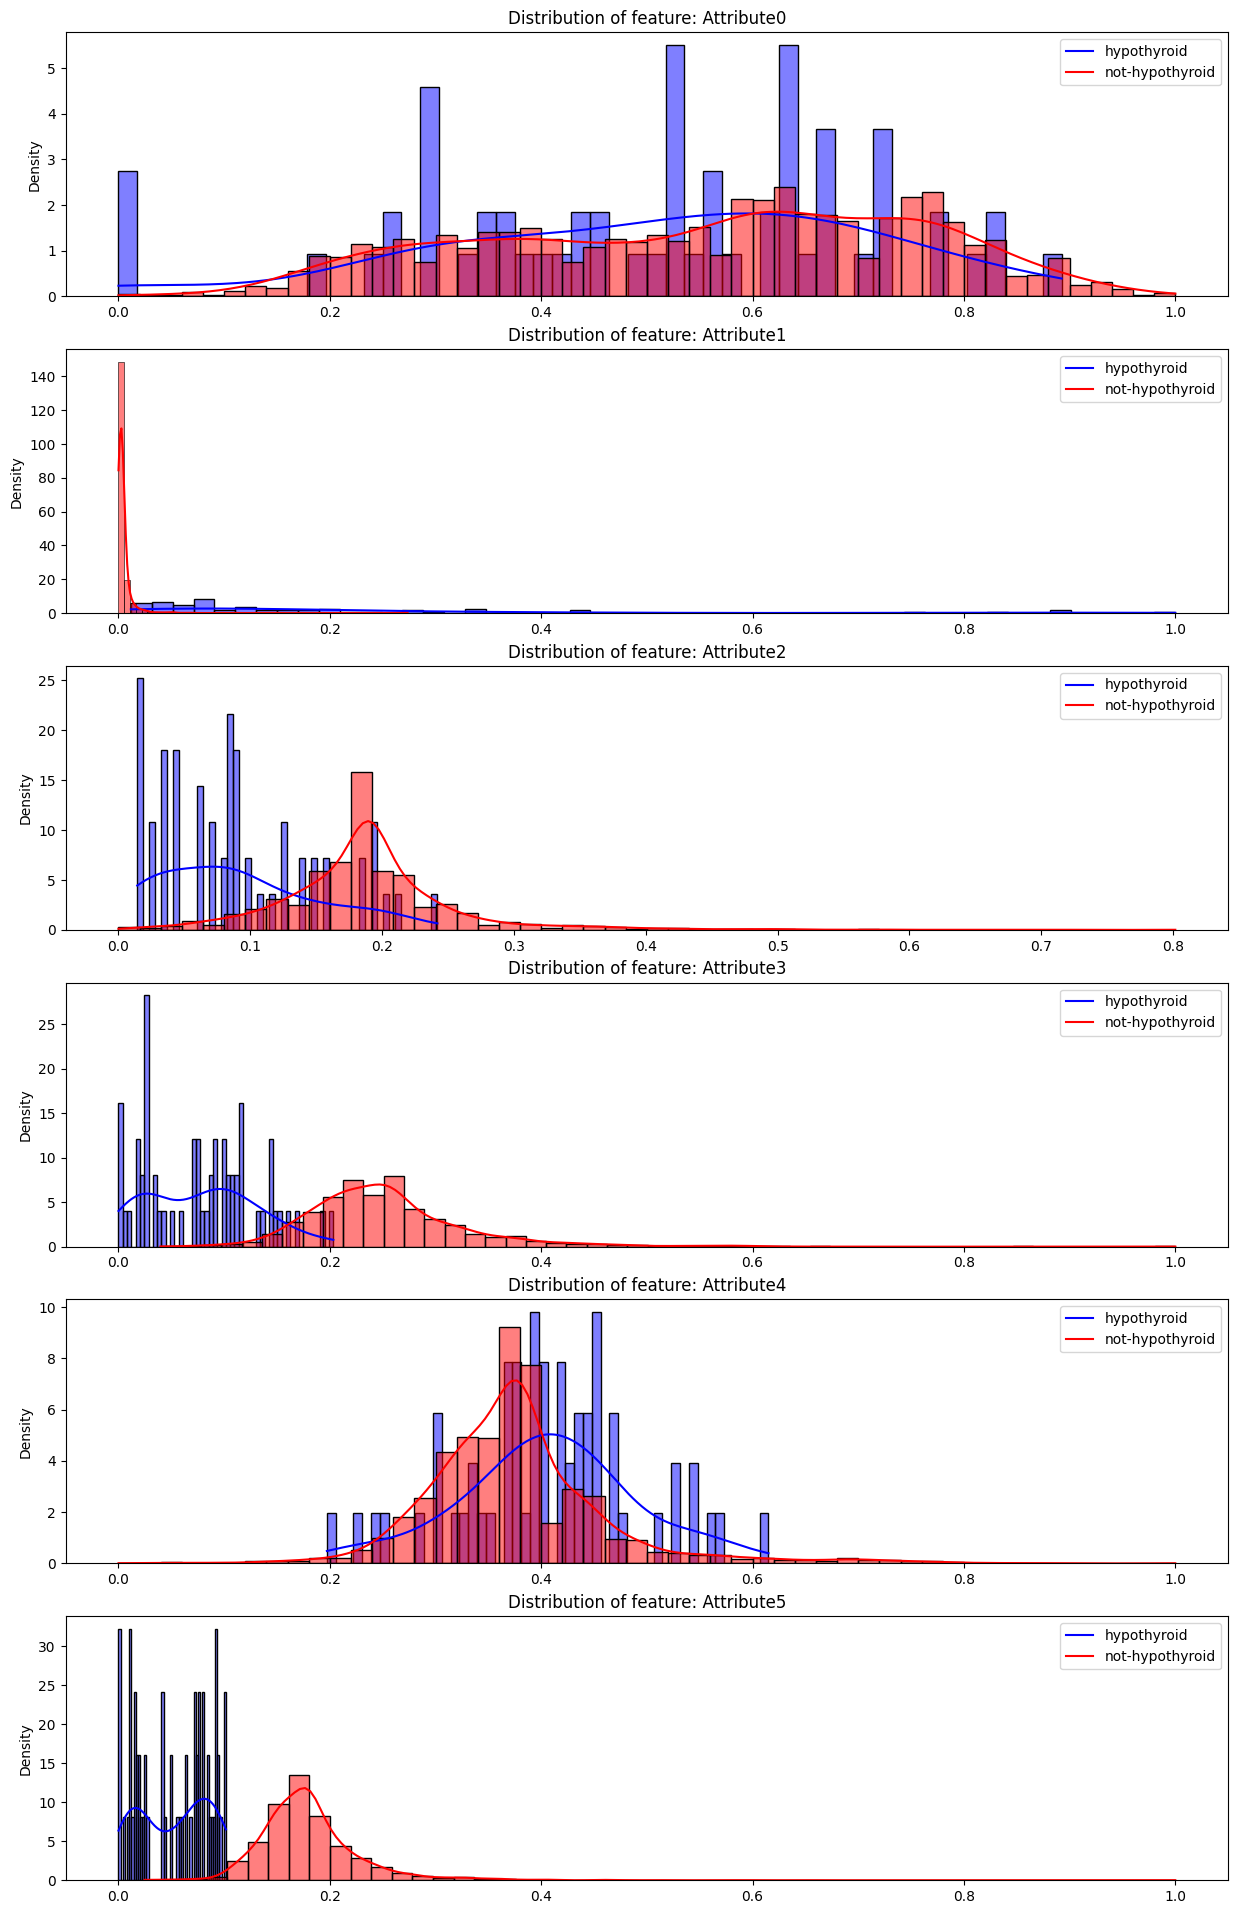

In [ ]:
import matplotlib.gridspec as gridspec
features=list(df.columns[:-1])
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    print(feat)
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['hypothyroid', 'not-hypothyroid'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

The graphs highlight differences in feature distributions between hypothyroid and not-hypothyroid classes, crucial for anomaly detection with a Gaussian model:

Gaussian Fit: Features like Attribute3 and Attribute5, with bell-shaped distributions for the not-hypothyroid class, fit well with a Gaussian model. The hypothyroid class deviates, making these features useful for anomaly detection.


Skewed Features: Attribute2 is skewed and may require transformation to meet the Gaussian assumption.


Class Overlap: Attribute0 and Attribute1 show significant overlap between classes, reducing their effectiveness for anomaly detection.


In summary, the Gaussian model is best suited for features with distinct class separation, while skewed features may need transformation.

## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``.
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table.
  4. Find the best 3 features to distinguish hypothyroid patients from not-hypothyroid patients based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that patient as hypothyroid. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.5]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a.
 2. Compute AUC and F1 score when you fit a Gaussian **only on not-hypothyroid patients** (instead of all the patients).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table. **[0.8]**
 4. Are these results different or similar? Why?**[0.5]**





**1. Fit a Single Gaussian Distribution for Each Feature and Compute AUC:**

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Features to evaluate
features = list(df.columns[:-1])  # Assuming the last column is the target 'hypothyroid'

# Step 1: Fit a single Gaussian distribution for each feature and compute AUC
train_aucs = []
val_aucs = []
for feat in features:
    # Fit GaussianMixture on the full training data (both classes)
    gm = GaussianMixture(n_components=1, random_state=0)
    gm.fit(X_train[[feat]])

    # Compute log likelihood scores for training and validation sets
    train_scores = gm.score_samples(X_train[[feat]])
    val_scores = gm.score_samples(X_val[[feat]])

    # Calculate AUC on the training set and validation set
    train_auc = roc_auc_score(y_train, train_scores)
    val_auc = roc_auc_score(y_val, val_scores)

    train_aucs.append(train_auc)
    val_aucs.append(val_auc)

# Create a dataframe with the results
results_df = pd.DataFrame({
    'Feature': features,
    'Training AUC': train_aucs,
    'Validation AUC': val_aucs
})

# Display the AUC results for all features
print("AUC for all features (training and validation):")
print(results_df)


AUC for all features (training and validation):
      Feature  Training AUC  Validation AUC
0  Attribute0      0.543923        0.477132
1  Attribute1      0.049349        0.004477
2  Attribute2      0.194315        0.170296
3  Attribute3      0.059672        0.050877
4  Attribute4      0.422708        0.405082
5  Attribute5      0.032825        0.034362


**2. Sort and Identify the Best 3 Features Based on Validation AUC:**

In [ ]:
# Sort features by validation AUC and select the top 3
top_3_features = results_df.sort_values('Validation AUC', ascending=False).head(3)

# Display the top 3 features based on validation AUC
print("Top 3 features based on validation AUC:")
print(top_3_features)

Top 3 features based on validation AUC:
      Feature  Training AUC  Validation AUC
0  Attribute0      0.543923        0.477132
4  Attribute4      0.422708        0.405082
2  Attribute2      0.194315        0.170296


**3. Fit GaussianMixture on Each of the Top 3 Features and Compute**

In [ ]:
# Store the score samples for the top 3 features
for feat in top_3_features['Feature']:
    gm = GaussianMixture(n_components=1, random_state=0)
    gm.fit(X_train[[feat]])

    # Get validation scores (log likelihood) for each feature
    val_scores = gm.score_samples(X_val[[feat]])

    # Display score samples for the validation set for each top feature
    print(f"Score samples for feature: {feat}")
    print(val_scores[:10])  # Showing only the first 10 scores for brevity

Score samples for feature: Attribute0
[ 0.50166885  0.31681235  0.66970068  0.21878747 -0.66155167 -0.12714482
  0.35979749  0.58120535 -1.23566675  0.63675475]
Score samples for feature: Attribute4
[1.51083623 1.0881266  1.51083623 1.51155341 0.77472077 0.86891508
 1.51155341 1.51155341 1.51155341 1.28014969]
Score samples for feature: Attribute2
[1.72660799 1.26626743 1.69573149 1.69573149 1.42925809 1.38883778
 1.72660799 1.73786577 1.73786577 1.66840297]


**4. Calculate Optimal Thresholds and F1 Scores for Each of the Top 3 Features:**

In [ ]:
from sklearn.metrics import f1_score

optimal_thresholds = []
f1_scores = []

# Step 4: Find the optimal threshold for F1 score
for feat in top_3_features['Feature']:
    gm = GaussianMixture(n_components=1, random_state=0)
    gm.fit(X_train[[feat]])

    val_scores = gm.score_samples(X_val[[feat]])

    # Use percentiles of the scores as potential thresholds
    thresholds = np.percentile(val_scores, np.arange(1, 100, 1))  # Percentile-based threshold search
    best_f1 = 0
    best_threshold = None

    for threshold in thresholds:
        # Predict hypothyroid if the score is below the threshold
        val_predictions = (val_scores < threshold).astype(int)

        # Compute the F1 score
        f1 = f1_score(y_val, val_predictions)

        # Track the best F1 score and corresponding threshold
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    # Store the best threshold and F1 score for the feature
    optimal_thresholds.append(best_threshold)
    f1_scores.append(best_f1)

# Output the optimal thresholds and F1 scores for each feature
print("Optimal thresholds and F1 scores for top 3 features:")
for feat, threshold, f1 in zip(top_3_features['Feature'], optimal_thresholds, f1_scores):
    print(f"Feature: {feat}, Optimal Threshold: {threshold}, F1 Score: {f1}")


Optimal thresholds and F1 scores for top 3 features:
Feature: Attribute0, Optimal Threshold: 0.4486871637007796, F1 Score: 0.06876790830945559
Feature: Attribute4, Optimal Threshold: 0.9842152078339059, F1 Score: 0.0847457627118644
Feature: Attribute2, Optimal Threshold: 0.37833421186566696, F1 Score: 0.32142857142857145


**5. Display Final Table with Optimal Thresholds and F1 Scores for the Top 3 Features:**

In [ ]:
# Create and display a final dataframe with optimal thresholds and F1 scores
optimal_df = pd.DataFrame({
    'Feature': top_3_features['Feature'],
    'Optimal Threshold': optimal_thresholds,
    'F1 Score': f1_scores
})

print("Final table with optimal thresholds and F1 scores for top 3 features:")
print(optimal_df)


Final table with optimal thresholds and F1 scores for top 3 features:
      Feature  Optimal Threshold  F1 Score
0  Attribute0           0.448687  0.068768
4  Attribute4           0.984215  0.084746
2  Attribute2           0.378334  0.321429


**6. Report the Complexity (Big O Notation) for Finding the Optimal Threshold:**

In [ ]:
# Complexity Report:
# Fitting GaussianMixture is O(n), where n is the number of data points.
# Calculating score_samples is also O(n).
# Sorting the scores for percentile-based threshold search is O(n log n).
# Checking each threshold is O(n).
# Total complexity per feature is O(n log n) due to sorting.

print("The complexity for finding the optimal threshold per feature is O(n log n).")


The complexity for finding the optimal threshold per feature is O(n log n).


## **Part 3: Multiple feature model with one Gaussian distribution: [1 Marks]**
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components of the GM model.

  a. 2D plot:
 1. Pick two features (say, Attribute1 and Attribute2).
 2. Scatter plot (plt.scatter) those features on a figure (Attribute1 on the x-axis and Attribute2 on the y-axis).
 3. Color the data points based on their class (not-hypothyroid blue and hypothyroid red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on not-hypothyroid patients). Explain.  **[0.25]**
 5. Fit your Gaussian model on all the data points.
 6. Compute AUC on both training and validation sets
 7. Pick 3 new pairs of features and repeat steps 2 to 6. **[0.25]**
 8. For each pair, find a threshold to maximize your validation set F1 Score.**[0.25]**
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial) **[0.25]**





Task: Pick two features (e.g., Attribute1 and Attribute2), scatter plot them, and color the points based on their class (not-hypothyroid blue and hypothyroid red).

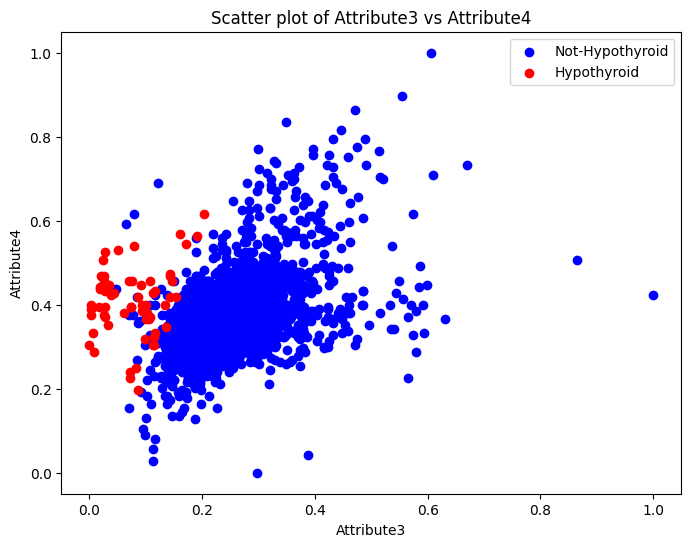

In [ ]:
import matplotlib.pyplot as plt

# Example features
feature_x = 'Attribute3'
feature_y = 'Attribute4'

# Scatter plot of the two features, color by class
plt.figure(figsize=(8,6))
plt.scatter(X_train[feature_x][y_train == 0], X_train[feature_y][y_train == 0], color='blue', label='Not-Hypothyroid')
plt.scatter(X_train[feature_x][y_train == 1], X_train[feature_y][y_train == 1], color='red', label='Hypothyroid')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.title('Scatter plot of Attribute3 vs Attribute4')
plt.show()


Step 2: Fit the Gaussian Mixture Model (n_components based on scatter plot)
Task: I have decided to go with 2 components as there are two distinct clusters in the scatter plot above.

In [ ]:
# Decide n_components based on scatter plot (example, n_components = 2)
n_components = 2

# Fit Gaussian Mixture model on the selected pair of features
gm = GaussianMixture(n_components=n_components, random_state=0)
gm.fit(X_train[[feature_x, feature_y]])

# Output the fitted GaussianMixture model
print(f"Fitted Gaussian Mixture model with {n_components} components for {feature_x} and {feature_y}.")

Fitted Gaussian Mixture model with 2 components for Attribute3 and Attribute4.


Step 3: Compute AUC on Both Training and Validation Sets
Task: After fitting the Gaussian model, compute AUC for both training and validation sets.

In [ ]:
# Compute log-likelihood scores for training and validation sets
train_scores = gm.score_samples(X_train[[feature_x, feature_y]])
val_scores = gm.score_samples(X_val[[feature_x, feature_y]])

# Compute AUC for both training and validation sets
train_auc = roc_auc_score(y_train, train_scores)
val_auc = roc_auc_score(y_val, val_scores)

print(f'AUC (Training Set): {train_auc}')
print(f'AUC (Validation Set): {val_auc}')

AUC (Training Set): 0.05398585040586325
AUC (Validation Set): 0.046218995765275245


Step 4: Repeat for 3 New Pairs of Features
Task: Pick three more pairs of features and repeat steps 1-3.

In [ ]:
# Repeat the same process for three new feature pairs
new_feature_pairs = [('Attribute1', 'Attribute2'), ('Attribute5', 'Attribute0'), ('Attribute2', 'Attribute5')]

for feature_x, feature_y in new_feature_pairs:
    # Scatter plot (optional, you can repeat Step 1)

    # Fit the Gaussian Mixture model
    gm = GaussianMixture(n_components=2, random_state=0)
    gm.fit(X_train[[feature_x, feature_y]])

    # Compute log-likelihood scores
    train_scores = gm.score_samples(X_train[[feature_x, feature_y]])
    val_scores = gm.score_samples(X_val[[feature_x, feature_y]])

    # Compute AUC
    train_auc = roc_auc_score(y_train, train_scores)
    val_auc = roc_auc_score(y_val, val_scores)

    print(f'Pair: ({feature_x}, {feature_y}) -> AUC (Training): {train_auc}, AUC (Validation): {val_auc}')


Pair: (Attribute1, Attribute2) -> AUC (Training): 0.02321397923963411, AUC (Validation): 0.019721718088324236
Pair: (Attribute5, Attribute0) -> AUC (Training): 0.04639617592280653, AUC (Validation): 0.04355716878402903
Pair: (Attribute2, Attribute5) -> AUC (Training): 0.05472956222706729, AUC (Validation): 0.0486388384754991


Step 5: Find the Threshold to Maximize F1 Score
Task: Find a threshold to maximize the validation set F1 score for each pair of features.

In [ ]:
# Include the original feature pair along with new feature pairs
all_feature_pairs = [('Attribute3', 'Attribute4'), ('Attribute5', 'Attribute0'), ('Attribute2', 'Attribute5'), ('Attribute1', 'Attribute2')]

# Initialize list to store best thresholds and F1 scores
optimal_thresholds = []
best_f1_scores = []

# Find optimal threshold for each pair
for feature_x, feature_y in all_feature_pairs:
    # Fit Gaussian Mixture
    gm = GaussianMixture(n_components=2, random_state=0)
    gm.fit(X_train[[feature_x, feature_y]])

    val_scores = gm.score_samples(X_val[[feature_x, feature_y]])

    # Use percentiles of the scores as potential thresholds
    thresholds = np.percentile(val_scores, np.arange(1, 100, 1))  # Percentile-based threshold search
    best_f1 = 0
    best_threshold = None

    for threshold in thresholds:
        # Predict hypothyroid if the score is below the threshold
        val_predictions = (val_scores < threshold).astype(int)

        # Compute the F1 score
        f1 = f1_score(y_val, val_predictions)

        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    optimal_thresholds.append(best_threshold)
    best_f1_scores.append(best_f1)

    print(f'Feature Pair: ({feature_x}, {feature_y}) -> Best Threshold: {best_threshold}, Best F1 Score: {best_f1}')

Feature Pair: (Attribute3, Attribute4) -> Best Threshold: -1.1224527613485966, Best F1 Score: 0.47368421052631576
Feature Pair: (Attribute5, Attribute0) -> Best Threshold: -0.9383197952628037, Best F1 Score: 0.45454545454545453
Feature Pair: (Attribute2, Attribute5) -> Best Threshold: -0.27428527694622984, Best F1 Score: 0.4489795918367347
Feature Pair: (Attribute1, Attribute2) -> Best Threshold: -0.6955536957442892, Best F1 Score: 0.5625


Step 6: Plot Outliers Based on the Threshold
Task: Plot the figure and circle outliers based on your optimal threshold.

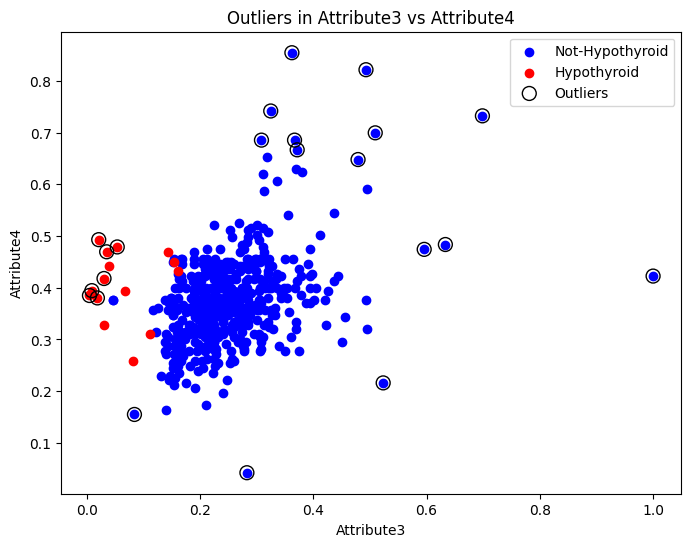

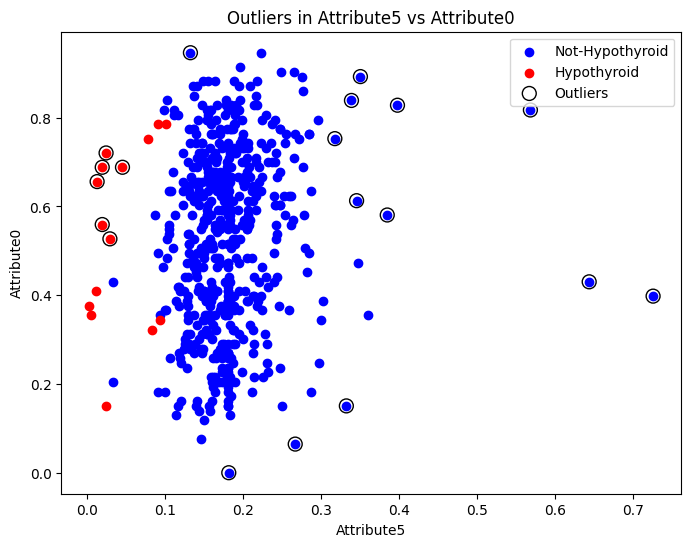

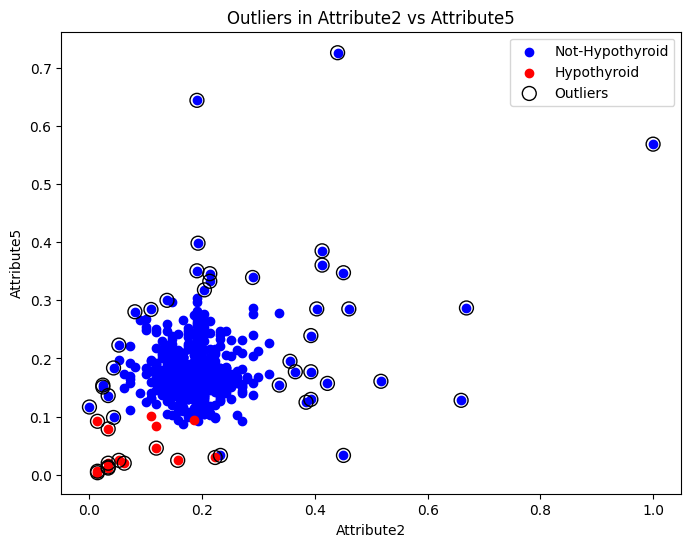

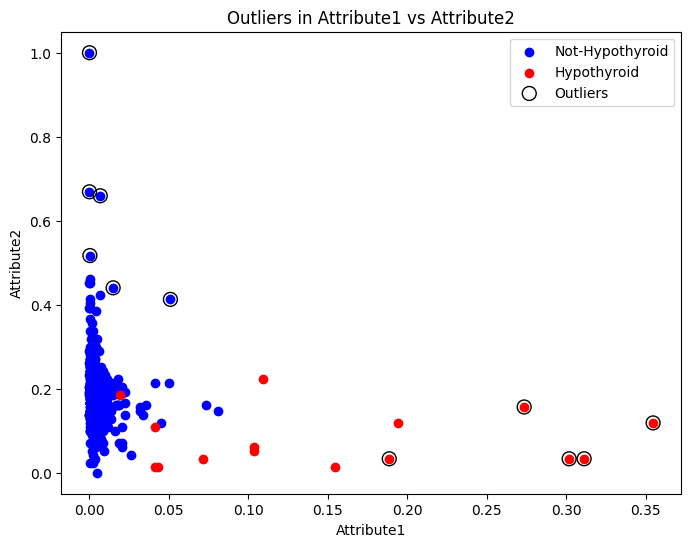

In [ ]:
for i, (feature_x, feature_y) in enumerate(all_feature_pairs):
    best_threshold = optimal_thresholds[i]

    # Fit Gaussian Mixture
    gm = GaussianMixture(n_components=2, random_state=0)
    gm.fit(X_val[[feature_x, feature_y]])

    # Compute scores and find outliers
    val_scores = gm.score_samples(X_val[[feature_x, feature_y]])
    outliers = (val_scores < best_threshold)

    # Scatter plot
    plt.figure(figsize=(8,6))
    plt.scatter(X_val[feature_x][y_val == 0], X_val[feature_y][y_val == 0], color='blue', label='Not-Hypothyroid')
    plt.scatter(X_val[feature_x][y_val == 1], X_val[feature_y][y_val == 1], color='red', label='Hypothyroid')

    # Highlight the outliers
    plt.scatter(X_val[feature_x][outliers], X_val[feature_y][outliers], facecolors='none', edgecolors='black', s=100, label='Outliers')

    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt.title(f'Outliers in {feature_x} vs {feature_y}')
    plt.show()

## **Part 4: Single feature model with two Gaussian distributions. [2 Marks]**
Now we will use two different distributions for hypothyroid and not-hypothyroid patients.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **not-hypothyroid patients** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **hypothyroid patients** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.25]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the patient is classified as hypothyroid. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the patient is hypothyroid (the patient belongs to the $G_2$ distribution which represents hypothyroid patients). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.25]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c? **[1]**

Step 1: Fit Gaussian Distribution for Not-Hypothyroid Patients (G1)

In [ ]:
# Select the feature (e.g., 'Attribute1')
feature = 'Attribute1'

# Fit a Gaussian on the feature for not-hypothyroid patients (class 0)
gm_not_hypothyroid = GaussianMixture(n_components=1, random_state=0)
gm_not_hypothyroid.fit(X_train[feature][y_train == 0].values.reshape(-1, 1))

print(f"Fitted Gaussian for not-hypothyroid patients on {feature}")

Fitted Gaussian for not-hypothyroid patients on Attribute1


Step 2: Fit Gaussian Distribution for Hypothyroid Patients (G2)

In [ ]:
# Fit a Gaussian on the feature for hypothyroid patients (class 1)
gm_hypothyroid = GaussianMixture(n_components=1, random_state=0)
gm_hypothyroid.fit(X_train[feature][y_train == 1].values.reshape(-1, 1))

print(f"Fitted Gaussian for hypothyroid patients on {feature}")

Fitted Gaussian for hypothyroid patients on Attribute1


Step 3: Compute Score Samples for Both G1 and G2 on Validation Set

In [ ]:
# Compute score samples for the validation set using both models
S1 = gm_not_hypothyroid.score_samples(X_val[feature].values.reshape(-1, 1))  # Scores for not-hypothyroid (G1)
S2 = gm_hypothyroid.score_samples(X_val[feature].values.reshape(-1, 1))  # Scores for hypothyroid (G2)

print(f"Computed score samples S1 (not-hypothyroid) and S2 (hypothyroid) for {feature}")

Computed score samples S1 (not-hypothyroid) and S2 (hypothyroid) for Attribute1


Step 4: Find Optimal c to Maximize F1 Score

In [ ]:
# Initialize variables to store the best F1 score and optimal c
best_f1 = 0
best_c = None

# Test values of c between 0 and 10 with a step of 0.1
c_values = np.arange(0, 10.1, 0.1)

for c in c_values:
    # Predict hypothyroid (class 1) if S1 < c * S2
    predictions = (S1 < c * S2).astype(int)

    # Compute F1 score
    f1 = f1_score(y_val, predictions)

    # Track the best F1 score and corresponding c
    if f1 > best_f1:
        best_f1 = f1
        best_c = c

print(f"Best F1 Score: {best_f1}, Best c: {best_c} for {feature}")

Best F1 Score: 0.8, Best c: 0.0 for Attribute1


Step 5: Repeat for All Features

In [ ]:
features = ['Attribute0', 'Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5']
best_f1_overall = 0
best_c_overall = None
best_feature = None

for feature in features:
    # Fit Gaussian for not-hypothyroid (G1)
    gm_not_hypothyroid = GaussianMixture(n_components=1, random_state=0)
    gm_not_hypothyroid.fit(X_train[feature][y_train == 0].values.reshape(-1, 1))

    # Fit Gaussian for hypothyroid (G2)
    gm_hypothyroid = GaussianMixture(n_components=1, random_state=0)
    gm_hypothyroid.fit(X_train[feature][y_train == 1].values.reshape(-1, 1))

    # Compute score samples
    S1 = gm_not_hypothyroid.score_samples(X_val[feature].values.reshape(-1, 1))
    S2 = gm_hypothyroid.score_samples(X_val[feature].values.reshape(-1, 1))

    # Find the optimal c and F1 score for this feature
    best_f1 = 0
    best_c = None
    for c in c_values:
        predictions = (S1 < c * S2).astype(int)
        f1 = f1_score(y_val, predictions)
        if f1 > best_f1:
            best_f1 = f1
            best_c = c

    print(f"Feature: {feature}, Best F1 Score: {best_f1}, Best c: {best_c}")

    # Track the best overall feature
    if best_f1 > best_f1_overall:
        best_f1_overall = best_f1
        best_c_overall = best_c
        best_feature = feature

print(f"Best overall feature: {best_feature}, Best F1 Score: {best_f1_overall}, Best c: {best_c_overall}")

Feature: Attribute0, Best F1 Score: 0.05952380952380952, Best c: 0.7000000000000001
Feature: Attribute1, Best F1 Score: 0.8, Best c: 0.0
Feature: Attribute2, Best F1 Score: 0.3829787234042553, Best c: 0.4
Feature: Attribute3, Best F1 Score: 0.7058823529411765, Best c: 0.30000000000000004
Feature: Attribute4, Best F1 Score: 0.1038961038961039, Best c: 0.9
Feature: Attribute5, Best F1 Score: 0.8, Best c: 0.30000000000000004
Best overall feature: Attribute1, Best F1 Score: 0.8, Best c: 0.0


## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate).
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on not-hypothyroid patients or to both classes.


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[4]**


**HINT !**

You might want to try a two-gaussian model, multiple features, a single component for the not-hypothyroid patient, and multiple components for hypothyroid ones! Why does it make sense to have multiple components for hypothyroid patients?

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score, f1_score
import pandas as pd

# Define the different combinations of features and number of components for the models
models = [
    {'features': ['Attribute0', 'Attribute1'], 'n_components_not_hypothyroid': 1, 'n_components_hypothyroid': 2},
    {'features': ['Attribute2', 'Attribute3'], 'n_components_not_hypothyroid': 1, 'n_components_hypothyroid': 3},
    {'features': ['Attribute0', 'Attribute2'], 'n_components_not_hypothyroid': 1, 'n_components_hypothyroid': 4},
    {'features': ['Attribute1', 'Attribute3'], 'n_components_not_hypothyroid': 2, 'n_components_hypothyroid': 2},
    {'features': ['Attribute0', 'Attribute4'], 'n_components_not_hypothyroid': 2, 'n_components_hypothyroid': 3},
    {'features': ['Attribute3', 'Attribute4'], 'n_components_not_hypothyroid': 1, 'n_components_hypothyroid': 1},
    {'features': ['Attribute2', 'Attribute5'], 'n_components_not_hypothyroid': 3, 'n_components_hypothyroid': 4},
    {'features': ['Attribute4', 'Attribute5'], 'n_components_not_hypothyroid': 1, 'n_components_hypothyroid': 2},
    {'features': ['Attribute1', 'Attribute4', 'Attribute5'], 'n_components_not_hypothyroid': 1, 'n_components_hypothyroid': 3},
    {'features': ['Attribute0', 'Attribute2', 'Attribute3'], 'n_components_not_hypothyroid': 2, 'n_components_hypothyroid': 2}
]

# Track the results for each model
results = []

for model in models:
    features = model['features']

    # Fit Gaussian for not-hypothyroid patients
    gm_not_hypothyroid = GaussianMixture(n_components=model['n_components_not_hypothyroid'], random_state=0)
    gm_not_hypothyroid.fit(X_train[features][y_train == 0])

    # Fit Gaussian for hypothyroid patients
    gm_hypothyroid = GaussianMixture(n_components=model['n_components_hypothyroid'], random_state=0)
    gm_hypothyroid.fit(X_train[features][y_train == 1])

    # Compute score samples for training set
    S1_train = gm_not_hypothyroid.score_samples(X_train[features])
    S2_train = gm_hypothyroid.score_samples(X_train[features])

    # Compute score samples for validation set
    S1_val = gm_not_hypothyroid.score_samples(X_val[features])
    S2_val = gm_hypothyroid.score_samples(X_val[features])

    # Initialize variables to store the best F1 score and optimal c for this model
    best_f1_train = 0
    best_f1_val = 0
    best_c_train = None
    best_c_val = None

    # Test values of c between 0 and 10 with a step of 0.1
    c_values = np.arange(0, 10.1, 0.1)

    for c in c_values:
        # Training set predictions
        train_predictions = (S1_train < c * S2_train).astype(int)
        f1_train = f1_score(y_train, train_predictions)

        # Validation set predictions
        val_predictions = (S1_val < c * S2_val).astype(int)
        f1_val = f1_score(y_val, val_predictions)

        # Track the best F1 score and corresponding c for training
        if f1_train > best_f1_train:
            best_f1_train = f1_train
            best_c_train = c

        # Track the best F1 score and corresponding c for validation
        if f1_val > best_f1_val:
            best_f1_val = f1_val
            best_c_val = c

    # Compute AUC for training and validation sets
    train_auc = roc_auc_score(y_train, S1_train)
    val_auc = roc_auc_score(y_val, S1_val)

    # Append results for this model
    results.append({
        'features': features,
        'n_components_not_hypothyroid': model['n_components_not_hypothyroid'],
        'n_components_hypothyroid': model['n_components_hypothyroid'],
        'train_auc': train_auc,
        'val_auc': val_auc,
        'best_f1_train': best_f1_train,
        'best_f1_val': best_f1_val,
        'best_c_train': best_c_train,
        'best_c_val': best_c_val
    })

# Convert results to a DataFrame for better presentation
results_df = pd.DataFrame(results)

# Display the results
print(results_df)  # Directly print the dataframe using pandas


                               features  n_components_not_hypothyroid  \
0              [Attribute0, Attribute1]                             1   
1              [Attribute2, Attribute3]                             1   
2              [Attribute0, Attribute2]                             1   
3              [Attribute1, Attribute3]                             2   
4              [Attribute0, Attribute4]                             2   
5              [Attribute3, Attribute4]                             1   
6              [Attribute2, Attribute5]                             3   
7              [Attribute4, Attribute5]                             1   
8  [Attribute1, Attribute4, Attribute5]                             1   
9  [Attribute0, Attribute2, Attribute3]                             2   

   n_components_hypothyroid  train_auc   val_auc  best_f1_train  best_f1_val  \
0                         2   0.030661  0.012341       0.693333     0.800000   
1                         3   0.0910

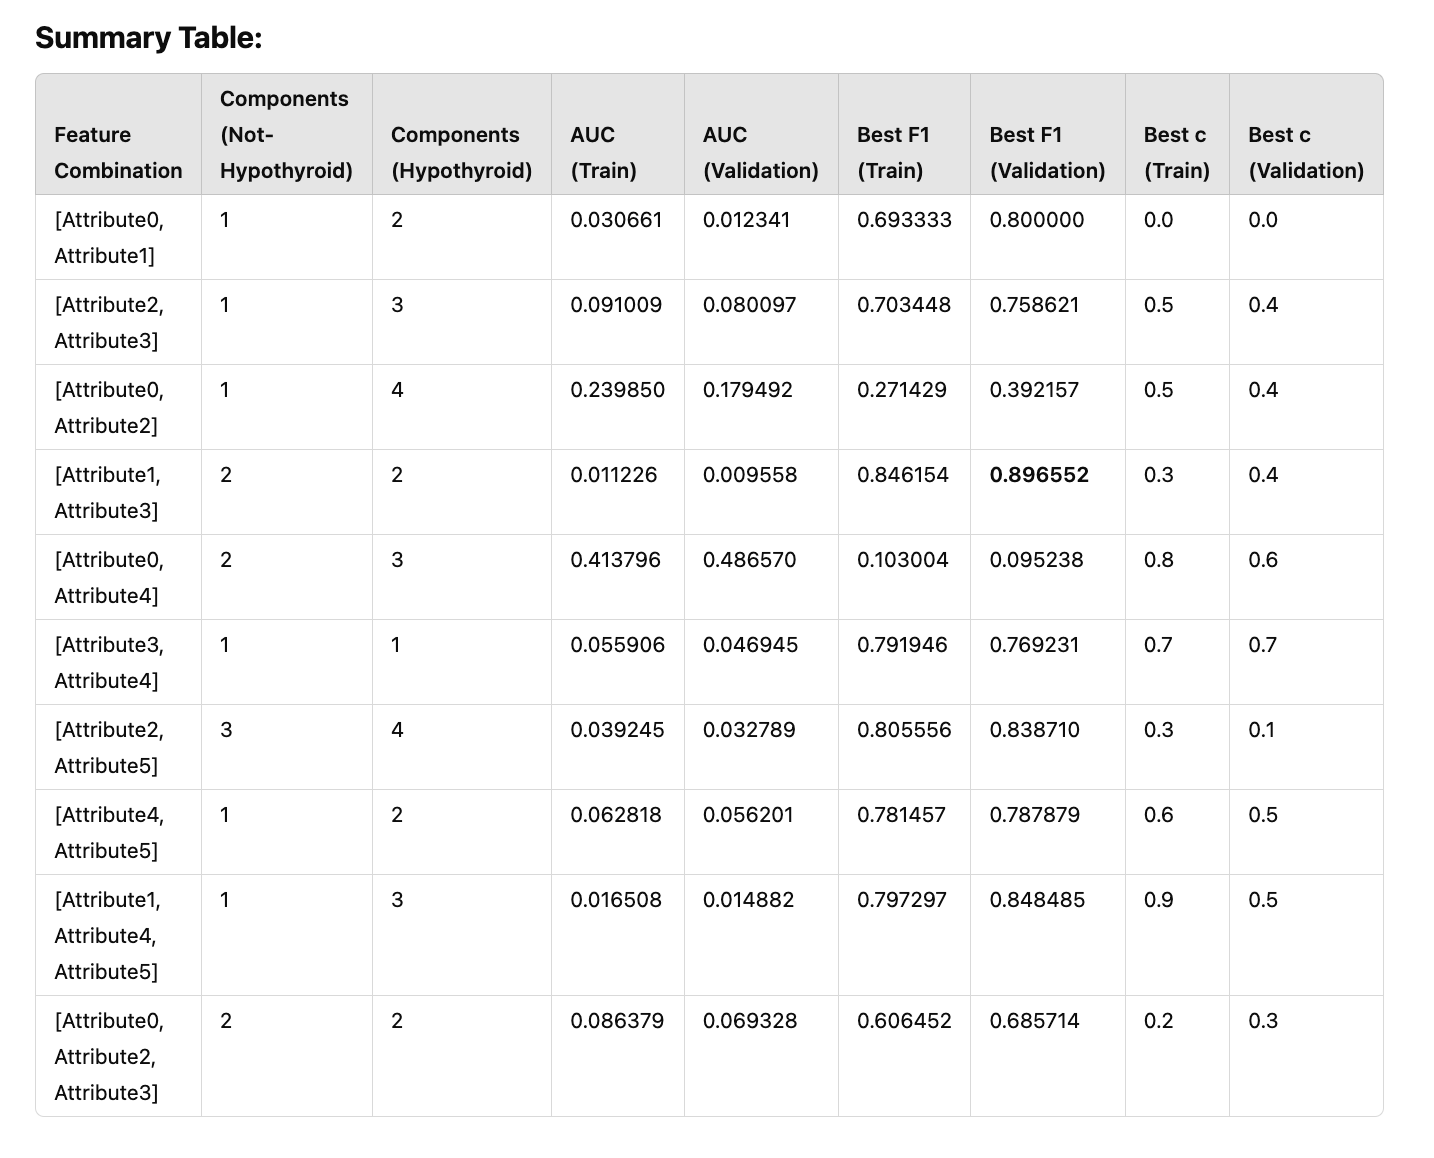

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


Step 1: Split the Data to Include a Test Set

In [ ]:
# Assuming df is your full dataset
X = df[['Attribute0', 'Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5']]
y = df['hypothyroid']

# Split into training, validation, and test sets (70% train, 15% validation, 15% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=0)  # 0.1765*85% ≈ 15%

Step 1: Train the Best Model on the Training Data: Found to be the model with [Attribute1, Attribute3] with 2 components for both classes

In [ ]:
# Fit the best GaussianMixture model on the full training set (combining X_train and X_val)
best_features = ['Attribute1', 'Attribute3']
n_components_not_hypothyroid = 2
n_components_hypothyroid = 2

# Fit Gaussian for not-hypothyroid patients
gm_not_hypothyroid = GaussianMixture(n_components=n_components_not_hypothyroid, random_state=0)
gm_not_hypothyroid.fit(X_train_val[best_features][y_train_val == 0])

# Fit Gaussian for hypothyroid patients
gm_hypothyroid = GaussianMixture(n_components=n_components_hypothyroid, random_state=0)
gm_hypothyroid.fit(X_train_val[best_features][y_train_val == 1])

# Compute score samples for the test set
S1_test = gm_not_hypothyroid.score_samples(X_test[best_features])
S2_test = gm_hypothyroid.score_samples(X_test[best_features])

# Optimal c found earlier was 0.4, apply it on the test set
c = 0.4
test_predictions = (S1_test < c * S2_test).astype(int)


Step 3: Compute the F1 Score, Precision, and Recall on the Test Set

In [ ]:
# Import necessary libraries
from sklearn.metrics import f1_score, precision_score, recall_score

# Calculate F1 Score, Precision, and Recall on the test set
f1_test = f1_score(y_test, test_predictions)
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)

print(f"F1 Score on Test Set: {f1_test}")
print(f"Precision on Test Set: {precision_test}")
print(f"Recall on Test Set: {recall_test}")

F1 Score on Test Set: 0.9375
Precision on Test Set: 0.8823529411764706
Recall on Test Set: 1.0


## **Part 7: Is Gaussian the only useful distribution? [1 Mark]**

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references.


**1. Log-Normal Distribution:**
The Log-Normal distribution is useful when the data is positively skewed and grows multiplicatively. It is widely used in finance to model stock prices, as asset returns are often multiplicative, and in economics for modeling income distributions. In a Log-Normal distribution, the logarithm of the variable is normally distributed, meaning that if your data spans several orders of magnitude and cannot be negative (e.g., income, prices, or biological measurements), the Log-Normal may provide a better fit than the Gaussian.

When it works better: In situations where data cannot take negative values and exhibits positive skew (e.g., income, waiting times).
Example: Modeling stock prices, where small changes multiply over time.

**Reference:**
Limpert, E., Stahel, W. A., & Abbt, M. (2001). "Log-normal distributions across the sciences: Keys and clues." BioScience, 51(5), 341-352.




**2. Weibull Distribution:**
The Weibull distribution is widely used in reliability engineering and failure analysis. It can model lifetimes of objects where the hazard rate (failure risk) changes over time, unlike the Gaussian which assumes symmetry. For example, machine parts may have a higher likelihood of failing as they age. The Weibull distribution offers flexibility in modeling data that has an increasing or decreasing failure rate, making it more suitable than Gaussian in many engineering and survival contexts.

When it works better: When modeling lifetimes or failure rates, particularly where the risk of failure changes over time (e.g., increasing wear and tear).
Example: Predicting the time until failure for mechanical parts.

**Reference:**
Abernethy, R. B. (2006). "The New Weibull Handbook." 5th edition, ISBN 0-9653062-1-6.

DECLARATION: CHATGPT was used for this assignment. I have provided proof as a PDF attached with my submission.